# Mini Project III

## Topics
This mini project is dedicated to following topics:

* Data Wrangling
* Data Visualization
* Data Preparation and Feature Engineering
* Dimensionality Reduction
* Unsupervised Learning
## Data
We will be using old data about different financial transactions. You can download the data from here. https://drive.google.com/file/d/1zAjnf936aHkwVCq_BmA47p4lpRjyRzMf/view?usp=sharing The data contains following tables:

* twm_customer - information about customers
* twm_accounts - information about accounts
* twm_checking_accounts - information about checking accounts (subset of twm_accounts)
* twm_credit_accounts - information about checking accounts (subset of twm_accounts)
* twm_savings_accounts - information about checking accounts (subset of twm_accounts)
* twm_transactions - information about financial transactions
* twm_savings_tran - information about savings transactions (subset of twm_transactions)
* twm_checking_tran - information about savings transactions (subset of twm_transactions)
* twm_credit_tran - information about credit checking (subset of twm_transactions)
## Output
In this miniproject, we will:

1) create two separate customer segmentations (using clustering) to split them into 3-5 clusters:
    * based on demographics (only on the information from twm_customer)
    * based on their banking behavior. We can take following things into consideration as banking behavior:
        * do they have savings account? How much do they save?
        * do they have credit account? How much do they live in debt?
        * are they making lot of small transactions or few huge ones?
2) visualize the created clusters using radar charts and compare them agains each other https://plotly.com/python/radar-chart/
3) visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4) (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    * we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.

In [47]:
import datetime
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
df_cust = pd.read_csv('data/twm_customer.csv', sep=';')

In [21]:
def removeWhitespace(df):
    for column in df:
        if type(df[column][1]) is str: # check type data is string
            try:
                df[column] = df[column].str.strip()
                print(df[column].name, 'stripped')
            except:
                print('A problem occurred on column', df[column].name)

In [163]:
removeWhitespace(df_cust)

gender stripped
name_prefix stripped
first_name stripped
last_name stripped
street_name stripped
city_name stripped
state_code stripped


In [169]:
df_cust.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald,Marek,8298,Second,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi,Moussavi,10603,Daffodil,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa,Johnston,8817,Figueroa,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa,Martin,676,Humble,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara,O'Malley,6578,C,10138,New York City,NY


In [88]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        if cluster >= 0: # do not add centroid for outlyer points
            X_centroids.append(np.mean(x)) 
            Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=200,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

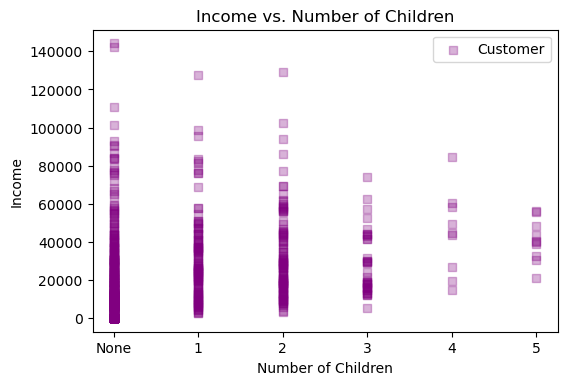

In [164]:
fig, ax = plt.subplots()
y = df_cust['income']
x = df_cust['nbr_children']
ax.scatter(x, y, color='purple', label='Customer', alpha=0.3, marker='s')
plt.xlabel('Number of Children')
plt.ylabel('Income')
fig.set_dpi(100)
plt.title('Income vs. Number of Children')
fig.patch.set_facecolor('white')
plt.xticks([0, 1 ,2 ,3 , 4, 5], ['None', 1, 2, 3, 4, 5])
plt.legend()
plt.savefig('Income_vs_Children')
plt.show()

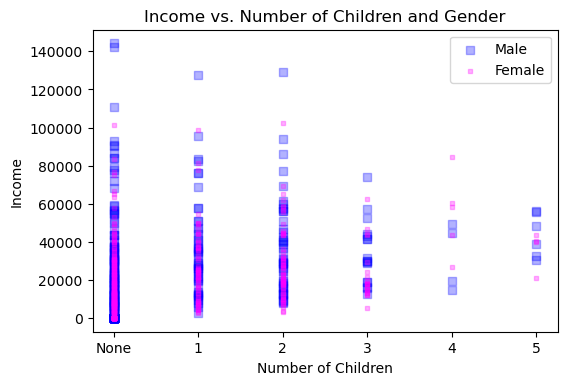

In [166]:
fig, ax = plt.subplots()
y1 = df_cust[df_cust['gender']=='M']['income']
x1 = df_cust[df_cust['gender']=='M']['nbr_children']
y2 = df_cust[df_cust['gender']=='F']['income']
x2 = df_cust[df_cust['gender']=='F']['nbr_children']

ax.scatter(x1, y1, color='blue',label='Male', alpha=0.3, marker='s')
ax.scatter(x2, y2, color='fuchsia', s=6, label='Female', alpha=0.3, marker='s')
plt.xlabel('Number of Children')
plt.ylabel('Income')
fig.set_dpi(100)
plt.title('Income vs. Number of Children and Gender')
fig.patch.set_facecolor('white')
plt.xticks([0, 1 ,2 ,3 , 4, 5], ['None', 1, 2, 3, 4, 5])
plt.legend()
plt.savefig('Income_vs_Children_Gender')
plt.show()

In [85]:
z = df_cust[df_cust['marital_status']==0]['income']

In [86]:
len(z)

0

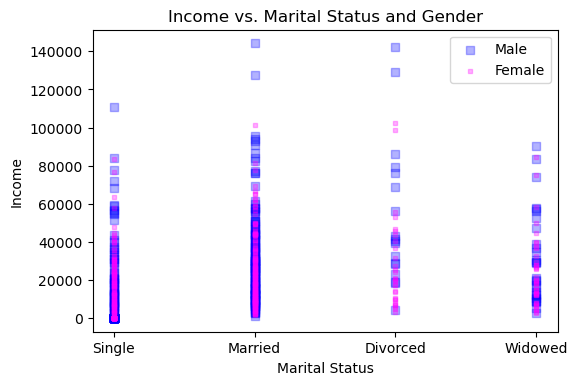

In [167]:
fig, ax = plt.subplots()
y1 = df_cust[df_cust['gender']=='M']['income']
x1 = df_cust[df_cust['gender']=='M']['marital_status']
y2 = df_cust[df_cust['gender']=='F']['income']
x2 = df_cust[df_cust['gender']=='F']['marital_status']

ax.scatter(x1, y1, color='blue', label='Male', alpha=0.3, marker='s')
ax.scatter(x2, y2, color='fuchsia', s=6, label='Female', alpha=0.3, marker='s')
plt.xlabel('Marital Status')
plt.ylabel('Income')
fig.set_dpi(100)
plt.title('Income vs. Marital Status and Gender')
fig.patch.set_facecolor('white')
plt.xticks([1 ,2 ,3 , 4], ['Single', 'Married', 'Divorced', 'Widowed'])
plt.legend()
plt.savefig('Income_vs_Marital_Status_Gender')
plt.show()

In [19]:
# import credit_tran data
df_credit_tran = pd.read_csv('data/twm_credit_tran.csv', sep=';')

In [22]:
removeWhitespace(df_credit_tran)

tran_date stripped
tran_time stripped
channel stripped
tran_code stripped


In [111]:
### OLD OLD OLD VERSION

def cleanDateCell(cell):
    day = ''
    month = ''
    year = ''
    datePart = 0
    for char in cell:
        if not (char.isdigit() or (char == '.')) :
            print('incompatible type 1')
            break
        if char == '.':
            datePart += 1
            continue  
        if datePart == 0:
            day = day + char
        if datePart == 1:
            month = month + char
        if datePart == 2:
            year = year + char

    day, month, year = int(day), int(month), int(year)
    if day > 0 and day <= 31 and month > 0 and month <= 12 and year > 1800 and year < 2100:
        try:
            date = datetime.datetime(int(year), int(month), int(day))
            return date # returns to update cell
        except:
            print('incompatible type2')
    return False

In [112]:
### OLD OLD OLD VERSION

def cleanDateColumn(df, column):
    if type(df[column][0]) is datetime.datetime:
        print('data is alredy in datetime format')
    else:
        for rowNum in range(len(df[column])):
            data = cleanDateCell(df[column][rowNum])
            if(data):
                df[column][rowNum] = data

In [110]:
cleanDateColumn(df_credit_tran, 'tran_date')

data is alredy in datetime format


In [23]:
def cleanTimeCell(cell):
    if not cell.isdigit():
        return (0, 0, 0)
    #seconds = cell[-2:]
    seconds = ('00', cell[-2:])[cell[-2:] != '']
    #minutes = cell[-4:-2]
    minutes = ('00',cell[-4:-2])[cell[-4:-2] != '']
    hours = ('00',cell[-6:-4])[cell[-6:-4] != '']
    hours, minutes, seconds = int(hours), int(minutes), int(seconds)
    return (hours, minutes, seconds)

In [48]:
def cleanDateCell(cell):
    day = ''
    month = ''
    year = ''
    datePart = 0
    for char in cell:
        if not (char.isdigit() or (char == '.')) :
            print('incompatible type 1')
            break
        if char == '.':
            datePart += 1
            continue  
        if datePart == 0:
            day = day + char
        if datePart == 1:
            month = month + char
        if datePart == 2:
            year = year + char

    year, month, day = int(year), int(month), int(day)
    if day > 0 and day <= 31 and month > 0 and month <= 12 and year > 1800 and year < 2100:
        return (year, month, day) # returns to update cell
    
    print('incompatible type2')
    return False

In [49]:
def cleanDateTimeColumn(df, date_column, time_column):
    if 'tran_datetime' in set(list(df.columns)):
        print('data is alredy in datetime format')
    else:
        df['tran_datetime'] = np.zeros(len(df))
        for rowNum in range(len(df[date_column])):
            date_info = cleanDateCell(df[date_column][rowNum])
            time_info = cleanTimeCell(df[time_column][rowNum])
            if(date_info):
                year, month, day = date_info
                hour, minute, second = time_info
                df['tran_datetime'][rowNum] = datetime.datetime(year, month, day, hour, minute, second)

In [283]:
cleanTimeCell('5904')

(0, 59, 4)

In [26]:
cleanDateTimeColumn(df_credit_tran, 'tran_date', 'tran_time')

C:\Users\micha\AppData\Local\Temp/ipykernel_37612/816566615.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tran_datetime'][rowNum] = datetime.datetime(year, month, day, hour, minute, second)


In [29]:
df_credit_tran

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,tran_datetime
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG,1995-10-20 10:11:44
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG,1995-10-13 08:31:15
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ,1995-02-26 08:41:29
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG,1995-01-03 19:18:15
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG,1995-07-04 10:08:11
...,...,...,...,...,...,...,...,...,...,...,...
20162,1363002,60,-94.52,-94.52,0.0,-3733.22,20.5.1995,224723,E,CG,1995-05-20 22:47:23
20163,1362995,36,0.00,0.00,0.0,-2300.00,28.9.1995,142011,B,IQ,1995-09-28 14:20:11
20164,1363196,39,-100.00,-100.00,0.0,-289.91,12.5.1995,152852,A,CA,1995-05-12 15:28:52
20165,1363393,61,-63.04,-63.04,0.0,-736.70,16.10.1995,145535,E,CG,1995-10-16 14:55:35


In [32]:
df_credit_tran = df_credit_tran.drop(columns=['tran_date', 'tran_time'])

In [27]:
#z = df_credit_tran.groupby({'cust_id' : set(df_credit_tran['cust_id'].values.tolist())})
z = df_credit_tran.groupby(by = ['cust_id']).sum()

In [28]:
z

,tran_id,tran_amt,principal_amt,interest_amt,new_balance
cust_id,,,,,
1362480,528,1948.66,1587.40,361.26,-72644.51
1362484,1540,923.87,909.06,14.81,-15118.03
1362485,2628,-761.23,-817.62,56.93,-49799.60
1362487,528,-1535.59,-1548.23,13.63,-25387.04
1362489,630,1694.18,1445.41,248.77,-85142.68
...,...,...,...,...,...
1363483,3003,25.78,-53.74,79.61,-50439.36
1363484,780,471.14,458.93,12.21,-7219.47
1363485,276,3202.51,3161.24,41.27,-6860.00


In [36]:
df_credit_tran[df_credit_tran['cust_id'] == 1362480].sort_values(by=['cust_id', 'tran_datetime'])

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,channel,tran_code,tran_datetime
1098,1362480,1,163.00,140.36,22.64,-1467.04,C,PM,1995-01-03 17:00:31
8469,1362480,2,-200.00,-200.00,0.00,-1667.04,A,CA,1995-01-04 01:54:11
16275,1362480,3,-225.14,-225.14,0.00,-1892.18,E,CG,1995-01-04 16:39:18
3845,1362480,4,-607.82,-607.82,0.00,-2500.00,E,CG,1995-01-20 15:30:58
11774,1362480,5,252.07,231.41,20.66,-2268.59,M,PM,1995-02-02 00:00:00
19776,1362480,6,-178.60,-178.60,0.00,-2447.19,E,CG,1995-02-07 14:45:40
6629,1362480,7,-52.81,-52.81,0.00,-2500.00,E,CG,1995-02-07 18:31:40
14259,1362480,8,253.19,221.24,31.95,-2278.76,B,PM,1995-03-02 12:34:03
1988,1362480,9,-221.24,-221.24,0.00,-2500.00,E,CG,1995-03-04 07:22:21
9752,1362480,10,253.21,221.12,32.09,-2278.88,M,PM,1995-04-07 00:00:00


In [33]:
df_credit_tran.sort_values(by=['cust_id', 'tran_datetime'])

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,channel,tran_code,tran_datetime
1098,1362480,1,163.00,140.36,22.64,-1467.04,C,PM,1995-01-03 17:00:31
8469,1362480,2,-200.00,-200.00,0.00,-1667.04,A,CA,1995-01-04 01:54:11
16275,1362480,3,-225.14,-225.14,0.00,-1892.18,E,CG,1995-01-04 16:39:18
3845,1362480,4,-607.82,-607.82,0.00,-2500.00,E,CG,1995-01-20 15:30:58
11774,1362480,5,252.07,231.41,20.66,-2268.59,M,PM,1995-02-02 00:00:00
...,...,...,...,...,...,...,...,...,...
509,1363492,25,719.12,627.97,91.15,-6472.03,M,PM,1995-10-05 00:00:00
3866,1363492,26,656.32,565.17,91.15,-5906.86,M,PM,1995-11-05 00:00:00
7190,1363492,27,-1193.14,-1193.14,0.00,-7100.00,E,CG,1995-11-14 13:11:00
10708,1363492,28,718.32,635.13,83.19,-6464.87,M,PM,1995-12-07 00:00:00


In [46]:
import copy
q = [2, 2]
w = copy.copy(q)
q = 1
w

[2, 2]